In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [37]:
ratings = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'])
movies = pd.read_csv('movies.csv')

## Ratings dataset

In [38]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [39]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
userId     100836 non-null int64
movieId    100836 non-null int64
rating     100836 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [40]:
ratings.shape

(100836, 3)

In [41]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


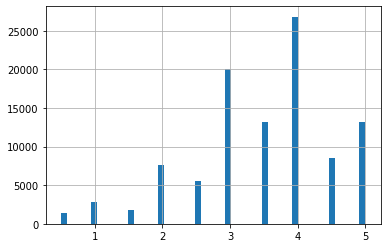

In [42]:
ratings['rating'].hist(bins=50)

## Movies dataset

In [43]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [45]:
movies['genres']

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

# Create matrix

In [46]:
ratingsMatrix = ratings.pivot(index='userId', columns='movieId', values='rating')

In [47]:
ratingsMatrix = ratingsMatrix.fillna(0)

In [48]:
ratingsMatrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
ratingsMatrix.shape

(610, 9724)

In [50]:
R = ratingsMatrix.to_numpy()

### Extract only indices and ratings corresponding to observed values

In [51]:
nUsers, nFilms = ratingsMatrix.shape
samples = [(i, j, R[i,j]) for i in range(nUsers)
           for j in range(nFilms) if R[i,j] > 0]

In [52]:
nFeatures = 10
alpha = 0.05  # learning rate
beta = 1  # regularization parameter
nIterations = 100

In [53]:
U = np.random.randint(0, 5, size=(nUsers, nFeatures))
V = np.random.randint(0, 5, size=(nFilms, nFeatures))


array([0, 0, 2, 1, 1, 2, 4, 4, 1, 3])

# Gradient descent without regularization

In [54]:
#errors = []
for iIter in range(50):
    for i, j, r in samples:
        prediction = np.dot(U[i, :], V.T[:,j])
        error = r - prediction
        #errors.append((i, j, error))

        U[i,:] = U[i,:] + alpha*error*V[j,:]
        V[j,:] = V[j,:] + alpha*error*U[i,:]  